# 기울기

In [35]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10,10) * 0.01
x = np.random.randn(10,1)

for i in range(1,11):
    x = sigmoid(np.dot(weights,x))
    print(f'{i}번째 층 출력 평균: {np.mean(x)}')
    
x = np.linspace(-10,10,100)

1번째 층 출력 평균: 0.4923981391662232
2번째 층 출력 평균: 0.5007433168636295
3번째 층 출력 평균: 0.5007308165030734
4번째 층 출력 평균: 0.5007305713032845
5번째 층 출력 평균: 0.5007305725302615
6번째 층 출력 평균: 0.5007305725406197
7번째 층 출력 평균: 0.5007305725405601
8번째 층 출력 평균: 0.5007305725405591
9번째 층 출력 평균: 0.5007305725405591
10번째 층 출력 평균: 0.5007305725405591


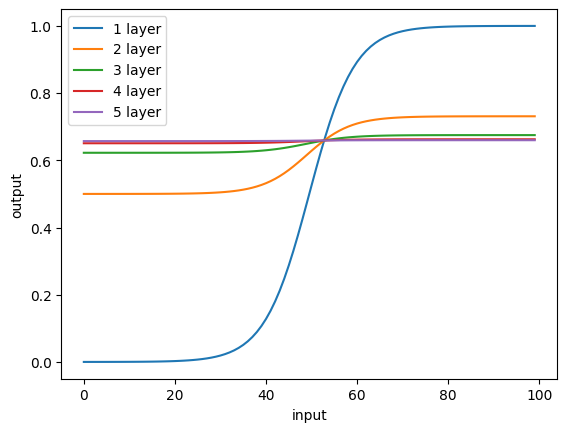

In [36]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)

for i in range(1,6):
    x = sigmoid(x)
    plt.plot(x, label=f'{i} layer')

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.show()

- 활성화 함수 변경

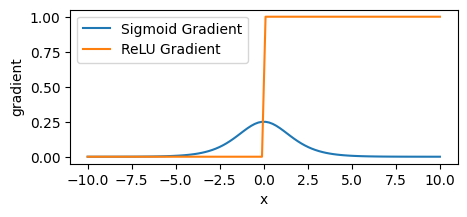

In [37]:
def relu(x):
    return np.maximum(0,x)

def sigmoid_grad(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu_grad(x):
    return np.where(x >0, 1,0)

x = np.linspace(-10,10,100)


plt.figure(figsize=(5,2))
plt.plot(x, sigmoid_grad(x), label='Sigmoid Gradient')
plt.plot(x, relu_grad(x), label='ReLU Gradient')
plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.show()


- 잔차 효과(Residual Connection) 효과

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

In [39]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10,10)
        self.layer2 = nn.Linear(10,10)
        
    def forward(self,x):
        return self.layer2(torch.relu(self.layer1(x)))


In [40]:
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10,10)

    def forward(self,x):
        return x + torch.relu(self.layer(x))    

In [44]:
class DeeperResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer1 = nn.Linear(10,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        
    def forward(self,x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual

In [41]:
simple_model = SimpleNN()
residual_model = ResidualNN()

x = torch.randn(1,10)

output_simple = simple_model(x)
output_residual = residual_model(x)

print(f'입력값- 일반 신경망: {x - output_simple}')
print(f'입력값- 잔차 연결 신경망: {x - output_residual}')

입력값- 일반 신경망: tensor([[-0.5827, -0.5648,  0.9306, -0.0157,  2.4938,  0.3331,  0.3314, -2.3501,
         -0.2540, -0.3380]], grad_fn=<SubBackward0>)
입력값- 잔차 연결 신경망: tensor([[ 0.0000,  0.0000, -0.5639, -0.0482,  0.0000,  0.0000, -0.1893,  0.0000,
          0.0000,  0.0000]], grad_fn=<SubBackward0>)


In [46]:
# 기울기 변화
x = torch.randn(100,10)
y = torch.randn(100,10)

# 모델 생성
sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN

#  손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optim = optim.Adam(deep_res_model.parameters(), lr=0.01)

TypeError: Module.parameters() missing 1 required positional argument: 'self'

In [ ]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []

for epoch in range(epochs):
    sim_optim.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output,y)
    sim_loss.backward()
    sim_optim.step()
    loss_sim_list.append(sim_loss.item())
    
    res_optim.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output,y)
    res_loss.backward()
    res_optim.step()
    loss_res_list.append(res_loss.item())
    
print(f'일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}')
print(f'일반 신경망 최종 손실값: {loss_res_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기: {param.grad.norm()}')
for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값: 0.7326
일반 신경망 최종 손실값: 1.5390
일반 신경망 기울기 크기: 0.022794034332036972
일반 신경망 기울기 크기: 0.008663269691169262
일반 신경망 기울기 크기: 0.01462590042501688
일반 신경망 기울기 크기: 0.012521248310804367
잔차 연결 신경망 기울기 크기: 0.08285496383905411
잔차 연결 신경망 기울기 크기: 0.007882247678935528


In [ ]:
class DeeperResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer1 = nn.Linear(10,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        
    def forward(self,x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual